/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2047256 entries, 0 to 2047255
Data columns (total 8 columns):
Accident_Severity                              object
Carriageway_Hazards                            object
Date                                           datetime64[ns]
Day_of_Week                                    object
Did_Police_Officer_Attend_Scene_of_Accident    float64
Junction_Control                               object
Junction_Detail                                object
Latitude                                       float64
dtypes: datetime64[ns](1), float64(2), object(5)
memory usage: 125.0+ MB
None
Proportion of Missing Values in Accidents Table: 0.495 %
2058262


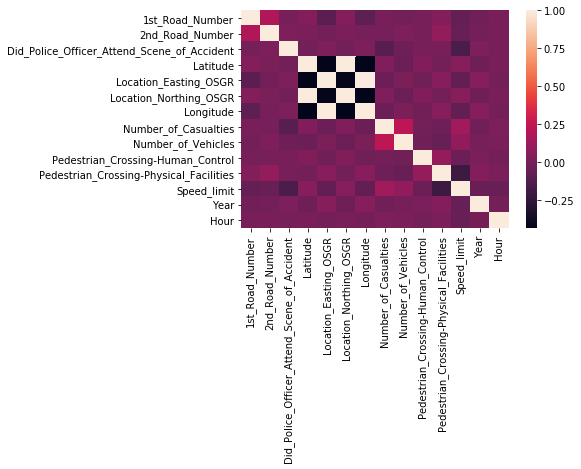

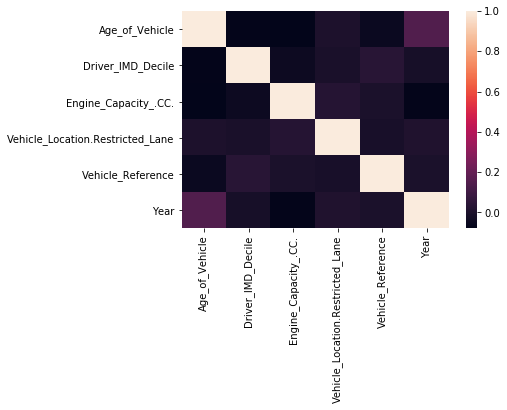

                                  Age_of_Vehicle  Driver_IMD_Decile  \
Age_of_Vehicle                          1.000000          -0.073439   
Driver_IMD_Decile                      -0.073439           1.000000   
Engine_Capacity_.CC.                   -0.079931          -0.042891   
Vehicle_Location.Restricted_Lane        0.000534          -0.004101   
Vehicle_Reference                      -0.048946           0.037456   
Year                                    0.151547          -0.016284   

                                  Engine_Capacity_.CC.  \
Age_of_Vehicle                               -0.079931   
Driver_IMD_Decile                            -0.042891   
Engine_Capacity_.CC.                          1.000000   
Vehicle_Location.Restricted_Lane              0.025612   
Vehicle_Reference                            -0.002018   
Year                                         -0.072641   

                                  Vehicle_Location.Restricted_Lane  \
Age_of_Vehicle           

NameError: name 'df_' is not defined

In [6]:
import pandas as pd
import numpy as np
accidents=pd.read_csv("Accident_Information.csv")
vehicles=pd.read_csv("Vehicle_Information.csv",encoding="ISO-8859-1")
import seaborn as sns
import matplotlib.pyplot as plt
accidents.head()

dfnew = pd.merge(accidents, vehicles, on='Accident_Index')
dfnew.replace("Data missing or out of range",np.nan)


import numpy as np
cols=['Accident_Index', '1st_Road_Class', '1st_Road_Number', '2nd_Road_Class',
       '2nd_Road_Number', 'Accident_Severity', 'Carriageway_Hazards', 'Date',
       'Day_of_Week', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'Junction_Control', 'Junction_Detail', 'Latitude', 'Light_Conditions',
       'Local_Authority_(District)', 'Local_Authority_(Highway)',
       'Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude',
       'LSOA_of_Accident_Location', 'Number_of_Casualties',
       'Number_of_Vehicles', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Police_Force',
       'Road_Surface_Conditions', 'Road_Type', 'Special_Conditions_at_Site',
       'Speed_limit', 'Time', 'Urban_or_Rural_Area', 'Weather_Conditions',
       'Year_x', 'InScotland', 'Hour', 'Daytime', 'Age_Band_of_Driver',
       'Age_of_Vehicle', 'Driver_Home_Area_Type', 'Driver_IMD_Decile',
       'Engine_Capacity_.CC.', 'Hit_Object_in_Carriageway',
       'Hit_Object_off_Carriageway', 'Journey_Purpose_of_Driver',
       'Junction_Location', 'make', 'model', 'Propulsion_Code',
       'Sex_of_Driver', 'Skidding_and_Overturning', 'Towing_and_Articulation',
       'Vehicle_Leaving_Carriageway', 'Vehicle_Location.Restricted_Lane',
       'Vehicle_Manoeuvre', 'Vehicle_Reference', 'Vehicle_Type',
       'Was_Vehicle_Left_Hand_Drive', 'X1st_Point_of_Impact', 'Year_y']
for i in cols:
    print(i)
    print(dfnew[i].isna().sum()*100/2058262)
cat_cols=["Day_of_Week","Accident_Severity",""]
dummies = pd.get_dummies(df_[cat_cols], drop_first=True)
df_model = pd.concat([dfnew, dummies], axis=1)

drop_cols = ["Time","Year_y","Driver_IMD_Decile"]
cat_cols  = ["Urban_or_Rural_Area","Weather_Conditions","InScotland","Daytime","Age_Band_of_Driver",
             "Driver_Home_Area_Type","Hit_Object_in_Carriageway","Hit_Object_off_Carriageway",'Journey_Purpose_of_Driver',
       'Junction_Location', 'make', 'model', 'Propulsion_Code',
       'Sex_of_Driver', 'Skidding_and_Overturning', 'Towing_and_Articulation',
       'Vehicle_Leaving_Carriageway', 'Vehicle_Location.Restricted_Lane',
       'Vehicle_Manoeuvre', 'Vehicle_Reference', 'Vehicle_Type',
       'Was_Vehicle_Left_Hand_Drive', 'X1st_Point_of_Impact']


In [20]:
dfnew["Vehicle_Location.Restricted_Lane"].unique()

array([ 0.,  2.,  8.,  3.,  4.,  7.,  9.,  6.,  5.,  1., nan])

In [3]:
!pip install group-lasso


DEPRECATION: Python 2.7 will reach the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 won't be maintained after that date. A future version of pip will drop support for Python 2.7. More details about Python 2 support in pip, can be found at https://pip.pypa.io/en/latest/development/release-process/#python-2-support


In [1]:
import numpy as np
# from group_lasso import GroupLasso

# Dataset parameters
num_data_points = 10000
num_features = 500
num_groups = 25
assert num_features % num_groups == 0

# Generate data matrix
X = np.random.standard_normal((num_data_points, num_features))

# Generate coefficients and intercept
w = np.random.standard_normal((500, 1))
intercept = 2

# Generate groups and randomly set coefficients to zero
groups = np.array([[group]*20 for group in range(25)]).ravel()
for group in range(num_groups):
    w[groups == group] *= np.random.random() < 0.8


(500,)